In [113]:
def white_balance(original):
    # Import all relevant packages to run PlantCV 
    import os
    import numpy as np
    import cv2 
    import matplotlib
    import random
    from matplotlib import pyplot as plt
    from matplotlib import image as mpimg
    %matplotlib inline
    from plantcv import plantcv as pcv 
    
    matplotlib.rcParams["figure.figsize"] = [14, 14]
    # change image to hsv (hue, saturation, value), and seperate brightness
    v = pcv.rgb2gray_hsv(original, channel='v')
    # Ignore lightest part of the image for calculating whitebalance
    img_binary1 = pcv.threshold.binary(v, threshold=160, max_value=255, object_type='dark')
    # find conservative estimate of the leaves
    img_binary2 = pcv.threshold.binary(v, threshold=110, max_value=255, object_type='light')
    # mask image to only look at background of leaves to find white balance
    masked = pcv.apply_mask(original, img_binary1, mask_color='white')
    masked = pcv.apply_mask(masked, img_binary2, mask_color='white')
    
    # change image to grayscale
    masked_binary = pcv.rgb2gray(masked)
    # only keep the darkest points in the image (outside of the leaves)
    masked_binary = pcv.threshold.binary(masked_binary, threshold=125, max_value=255, object_type='dark')
    # remove clusters of pixels that are less than 1000000
    masked_binary = pcv.fill(masked_binary, size=1000000)
    
    # identify objects in this gray region
    im2, contours, hierarchy = cv2.findContours(masked_binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    # determine how many objects are present and index largest object
    i = np.size(contours)
    final_max = 0
    # loop through objects to find the largest one and index which object that is
    for maximum in range(i):
        temp_max = np.shape(contours[maximum])[0]
        if temp_max > final_max:
            final_max = temp_max
            index = maximum
    
    # in the largest object, select x/y coordinates at random and use this as white balance 
    random_xy = random.randrange(0, np.shape(contours[index])[0])
    x = int(contours[index][random_xy][0][0])
    y = int(contours[index][random_xy][0][1])
    pcv.params.debug = 'plot'
    white_balance_corrected = pcv.white_balance(img=original, roi=(x,y,100,100))
    
    return (white_balance_corrected)

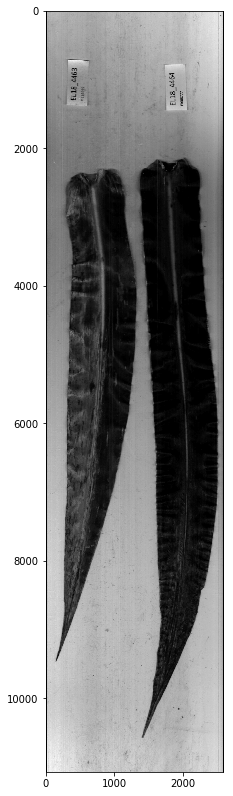

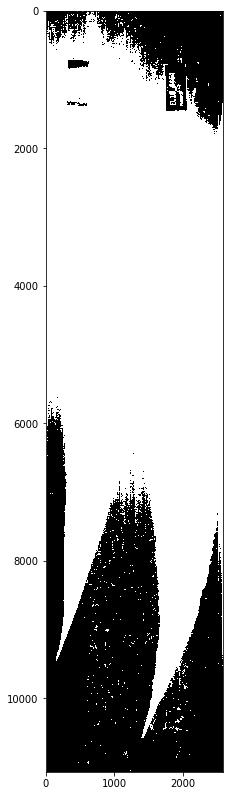

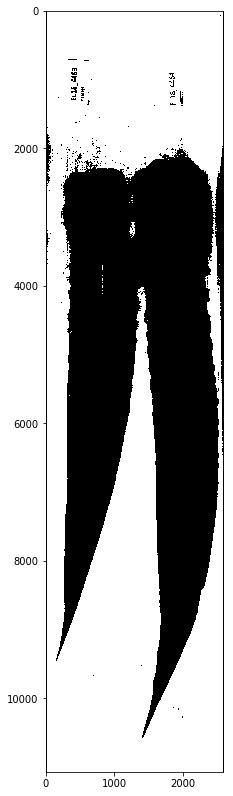

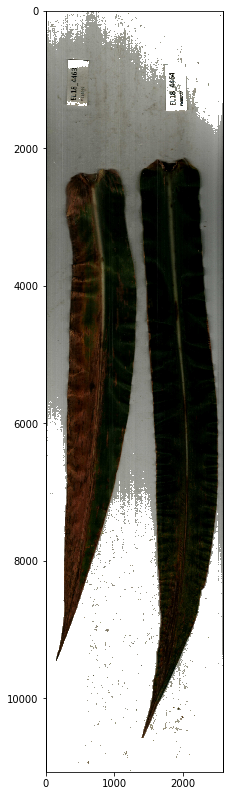

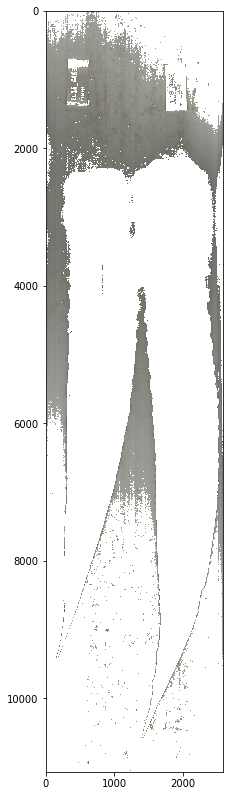

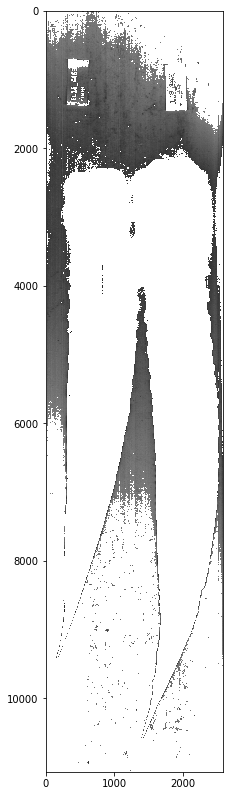

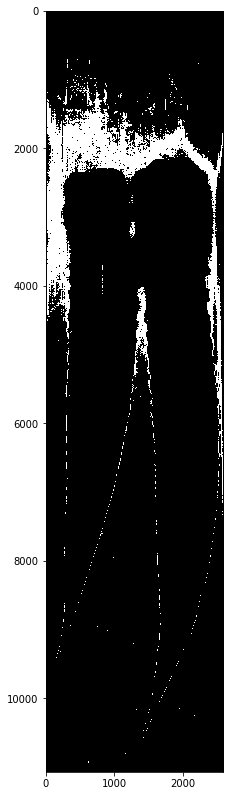

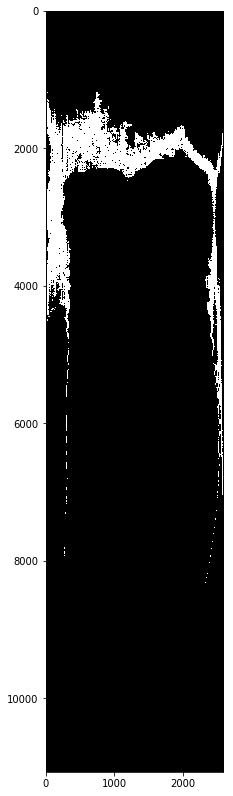

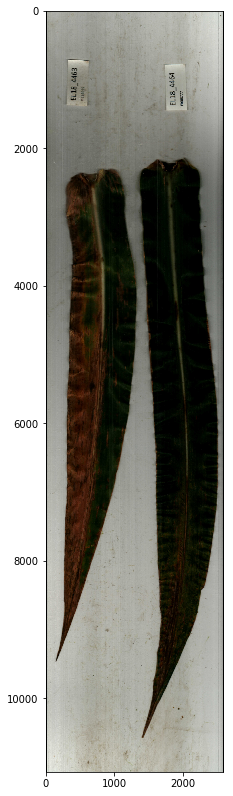

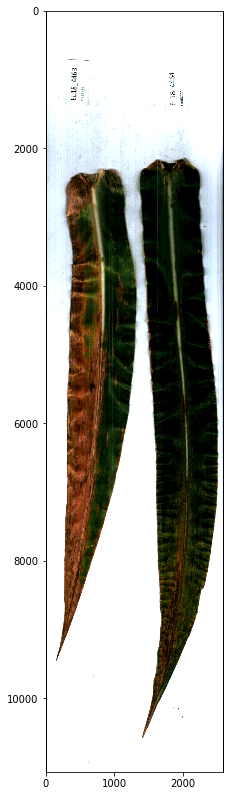

In [114]:
matplotlib.rcParams["figure.figsize"] = [14, 14]
# change this from '' to 'plot' to see what is happening to the image
pcv.params.debug = 'plot'
# send function "white_balance" the original image for color correction
new_image = white_balance(original)


In [109]:
type(new_image)

numpy.ndarray